<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [275]:
from time import sleep, process_time
import pandas as pd
from random import randint
import string
from sklearn.pipeline import Pipeline,  make_union, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
import requests
import bs4
from bs4 import BeautifulSoup
import re
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [2]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [4]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
title = []
company = []
location = []
salary = []
for job in soup.find_all('div', attrs={'data-tn-component': 'organicJob' }):
    try:
        title.append(job.find('a', attrs={'class': 'jobtitle turnstileLink'}).text)
    except:
        title.append(np.nan)
    try:
        company.append(job.find('a',attrs={'data-tn-element': 'companyName'}))
    except:
        company.append(np.nan)
    try:
        location.append(job.find('span',attrs={'class':'location accessible-contrast-color-location'}).text)
    except:
        location.append(np.nan)
    try:
        salary.append(job)
    except:
        salary.append(np.nan)

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [7]:
#this is my url with advanced search terms included
url  = 'https://www.indeed.co.uk/jobs?as_and=data&as_phr=&\
as_any=scientist%2C+analyst%2C+engineer%2C+machine+learning%2C+\
natural+language%2C+developer%2C+programmer%2C+architect&as_not=\
&as_ttl=&as_cmp=&jt=all&st=&salary=&radius=100&l=\
london&fromage=any&limit=50&sort=&psf=advsrch&from=advancedsearch'

In [123]:
#do for SPAN AND DIV

def get_title(result):
    try:
        return result.find('a', attrs={'class': 'jobtitle turnstileLink'}).text
    except:
        return np.nan
      
def get_loc(result):
    try:
        return result.find('span',attrs={'class':'location accessible-contrast-color-location'}).text
    except:
        return np.nan
    
def get_company(result):
    try:
        c1 = result.find('a',attrs={'data-tn-element': 'companyName'})
        c2 = result.find('span',attrs={'class': 'company'})
        if c1 != None:
            return c1.text
        elif c2 !=None:
            return c2.text 
        else:
            np.nan
    except:
        return np.nan
    
def get_salary(result):  
    try:
        s1 = result.find('span',attrs={'class':'salaryText'})
        s2 = result.find('span',attrs={'class':'salary no-wrap'})
        if s1 != None:
            return s1.text
        elif s2 !=None:
            return s2.text 
        else:
            np.nan
    except:
        return np.nan
    
def get_date(result):  
    try:
        return result.find('span',attrs={'class':'date'}).text
    except:
        return np.nan  
def get_desc(result):
    try:
        return result.find('div', attrs={'class': 'summary'}).text
    except:
        return np.nan

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [ ]:
url = 'https://www.indeed.co.uk/jobs?q=data+%28scientist+or+analyst+or+engineer+or+machine+or+learning+or+natural+or+language+or+developer+or+programmer+or+architect%29&l=london&radius=100&ts=1602791788606&rq=1&rsIdx=0&fromage=last&newcount=28&start={}'

Need to do more searches with a smaller radius each time. 

In [ ]:
url = 'https://www.indeed.co.uk/jobs?q=data+(scientist+or+analyst+or+engineer+or+machine+or+learning+or+natural+or+language+or+developer+or+programmer+or+architect)&l=london&radius=100&start=10'

In [ ]:
M10 6L8.59 7.41 13.17 12l-4.58 4.59L10 18l6-6-6-6z

In [134]:
t = process_time()
requestsno = 0

max_results_per_city = 10# Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []
for city in set(['London', 'Manchester', 'Cambridge','Glasgow',\
                 'Liverpool', 'Bristol', 'Newcastle Upon Tyne', 'Sheffield', \
                 'Reading',  'Leeds', 'Exeter', 'Essex', 'Bournemouth']):
#                 'Brighton', 'Glasgow', 'Stoke', 'Bicester','Liverpool', \
#                  'Birmingham', 'Oxford', 'Edinburgh', 'Kent', 'Cardiff']):

    print('city: ', city)
    start = 0
    while True:
        URL = f'https://www.indeed.co.uk/jobs?q=data+%28scientist\
+or+analyst+or+engineer+or+machine+or+learning+or+natural+or+\
language+or+developer+or+programmer+or+architect%29&l={city}&radius=\
50&ts=1602791788606&rq=1&rsIdx=0&fromage=last&newcount=28&start={start}'

        r = requests.get(URL)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class': "jobsearch-SerpJobCard" }):
            results.append((get_title(job), get_loc(job), get_salary(job), get_company(job), get_date(job), city, get_desc(job)))
        sleep(randint(5,9))

        #for monitoring
        requestsno+=1
        elapsed_time = process_time() -  t
        if start % 100 == 0:
            print(start, 'results shown')
        if soup.find(d='M10 6L8.59 7.41 13.17 12l-4.58 4.59L10 18l6-6-6-6z') is None:
            break
        start+=10

    print('Request: {}, Time passed: {}, Frequency: {} per second'.format(requestsno, elapsed_time, requestsno/elapsed_time))

city:  Newcastle Upon Tyne
0 results shown
100 results shown
200 results shown
300 results shown
Request: 38, Time passed: 13.082903999999985, Frequency: 2.904553912495272 per second
city:  Cambridge
0 results shown
100 results shown
200 results shown
300 results shown
400 results shown
500 results shown
600 results shown
700 results shown
Request: 110, Time passed: 37.27794399999999, Frequency: 2.9508065144365263 per second
city:  Sheffield
0 results shown
100 results shown
200 results shown
300 results shown
400 results shown
500 results shown
600 results shown
700 results shown
Request: 185, Time passed: 64.68433799999997, Frequency: 2.860043183869333 per second
city:  Reading
0 results shown
100 results shown
200 results shown
300 results shown
400 results shown
500 results shown
600 results shown
700 results shown
Request: 258, Time passed: 87.78165000000001, Frequency: 2.939110850616273 per second
city:  Bournemouth
0 results shown
100 results shown
200 results shown
300 results 

In [135]:
df_unclean = pd.DataFrame(results)
df_unclean.columns = ['title', 'location', 'salary', 'company', 'days_old', 'city', 'desc']

In [137]:
df_unclean

,title,location,salary,company,days_old,city,desc
0,"\nSoftware Engineer (C#, Python, Machine Learn...",NaN,"\n£25,000 - £32,000 a year",\nCloudTrade,8 days ago,Newcastle Upon Tyne,\n\n1+ years commercial experience in C# or si...
1,\nApprentice Analyst - Office 365 Engineer,Newcastle upon Tyne,"\n£19,995 - £24,125 a year","\nUK Government - Advisory, Conciliation and A...",8 days ago,Newcastle Upon Tyne,\n\nComply at all times with the relevant secu...
2,\nJunior Marketing Executive,NaN,"\n£18,762 - £22,000 a year",\nOne Utility Bill,Today,Newcastle Upon Tyne,\n\nYou’ll need to be comfortable digesting an...
3,\nJunior Data Analyst,Newcastle upon Tyne,None,\nIon Industries,30+ days ago,Newcastle Upon Tyne,\n\nA GCSE grade 4 or above in Maths and Engli...
4,\nMachine Learning Developer,Newcastle upon Tyne,"\n£45,000 - £50,000 a year",\nEurobase People,Today,Newcastle Upon Tyne,\n\nCan Analyse trends and data.\nI'm looking ...
...,...,...,...,...,...,...,...
13123,\nStock Analyst,NaN,"\n£40,000 - £45,000 a year",\nMichael Page UK,29 days ago,London,\n\nThe successful candidate will have experie...
13124,\nTreasury Analyst,NaN,"\n£40,000 - £45,000 a year",\nMichael Page UK,30+ days ago,London,"\n\nUniversity graduate, preferably in a maths..."
13125,\nCorporate Finance Analyst,NaN,"\n£55,000 - £60,000 a year",\nMichael Page UK,29 days ago,London,\n\nManage market data and analysis.\nAbility ...
13126,\nParking Engineer,NaN,\n£30 an hour,\nCarrington West,5 days ago,London,\n\nYour data will be shared with third party ...


In [138]:
#pickling so i can return to these results later
df_unclean.to_pickle('ldn-manc-cam22.pkl')
# df_ = pd.read_pickle('scraped.pkl')
# df_.columns = ['title', 'location', 'salary', 'company', 'days_old']

In [5]:
p1 = pd.read_pickle('bath-notts-guildford19.pkl')
p2 = pd.read_pickle('brighton-kent-edin.pkl')
p3 = pd.read_pickle('brighton-stoke19.pkl')
p4 = pd.read_pickle('ldn-cam19.pkl')
p5 = pd.read_pickle('ldn-manc-leeds.pkl')
p6 = pd.read_pickle('scraped.pkl')
p7 = pd.read_pickle('br-gl-st-bi-li22.pkl')
p8 = pd.read_pickle('ldn-manc-cam22.pkl')

In [6]:
df_19 = pd.concat([p1,p2,p3,p4,p5,p6,p7,p8]).drop(columns=[0])

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [125]:
#making a cleaning object
#this means that each time I scrape I can clean quickly and easily
class cleaning(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    #when there is a range for salary take the mean
    def _salary_fix(self, x):        
        
    #removes everything which isnt a number or a hyphen
        try: 
            pattern = re.compile(r'[\d-]')
            num_x =  ''.join(re.findall(pattern, x))
        except:
            return x

        #checking if salary is a range
        if '-' in num_x:
            l = num_x.split('-')
            lower = float(l[0])
            upper = float(l[1])
            mean = (lower+upper)/2
            val = mean
        else:
            val = float(num_x)

        #checking if salary is month, day, or year                
        if 'month' in x:
        #times by 12 if so
            return val*12
        
        elif 'weekly' in x or 'week' in x:
        #times by 225 if daily
            return val*40

        elif 'daily' in x or 'day' in x:
        #times by 225 if daily
            return val*218
        
        elif 'hourly' in x or 'hour' in x:
        #times by 225 if daily
            return np.nan


        else:
            return float(val)
        
    #remove \n from strings
    def _remove_n(self, x):
        try: 
            return x.replace('\n', '')
        except:
            return x
        
     #uses regex to remove the postcodes from location   
    def _remove_postcode(self, location):
        try:
            #removes full postcodes
            pattern = re.compile(r'([Gg][Ii][Rr] 0[Aa]{2})|((([A-Za-z][0-9]{1,2})|(([A-Za-z][A-Ha-hJ-Yj-y][0-9]{1,2})|(([A-Za-z][0-9][A-Za-z])|([A-Za-z][A-Ha-hJ-Yj-y][0-9][A-Za-z]?))))|\s?[0-9][A-Za-z]{2})$')
            result =  re.sub(pattern, '', location)
            #a separate regex for removing only 1st half postcodes like SW14 (for readability)
            pattern = re.compile(r'([A-Za-z][0-9]{1,2}).*|(([A-Za-z][A-Ha-hJ-Yj-y][0-9]{1,2})|(([A-Za-z][0-9][A-Za-z]).|([A-Za-z][A-Ha-hJ-Yj-y][0-9][A-Za-z]))).*')
            result =  re.sub(pattern, '', result)
            pattern = re.compile(r'\s$')
            result =  re.sub(pattern, '', result)
            return result
        except:
            return location
    
    #cleaning the company category: removing Uk government from entries
    def _govt_change(self, x):
        if type(x) == str and 'UK Government' in x:
            return x.replace('UK Government - ', '')
        
        #cleaning entries for GCHQ
        elif type(x) == str and 'GCHQ' in x:
            return 'GCHQ'
        else:
            return x    
        
        #going through the locations and seeing if in the job title
    def _rmv_location(self, x):
    
        if type(x) == str:
            for loc in self.locations_:
                if loc in x:
                    return x.replace(x, '')
                else:
                    return x
        else:
            return x
        
    #this function extracts and returns the job titles 

    def _title_remover(self, x):
        if type(x) == str:
            x = x.lower()
            #extracts job titles and then puts it in a new column
            pattern = re.compile(r'((data |machine learning |((?!\sdata)(\w*\s){0,2}))(engineer|architect|scientist|developer|analyst))|(intern)|(research)|(data backend)')
            result = re.search(pattern,x)
            if result != None:
                pattern = re.compile(r'data\s(analyst|engineer|scientist)')
                s = re.search(pattern, result.group(0))
                
                if s !=None:
                    return s.group(0)
                
                #checking if only analyst is present. this needs to be removed.
                pattern2 = re.compile(r'(?!data|business)\sanalyst')
                s2 = re.search(pattern2, result.group(0))
                if s2 != None:
                    return np.nan
                else:
                    return result.group(0)
            else:
        
                return np.nan
        else: 
            return np.nan
        
    #extracts job level   
    def _level_extracter(self, x):
        if type(x) == str:
            x = x.lower()
            
            pattern = re.compile(r'junior|senior|graduate|intern|principal|executive|assistant')
            result = re.search(pattern,x)
            if result != None:
                return result.group(0)
            else:
                return 'generic'
        
        else:
            return 'generic'
        
    def _date_cleaner(self, x):
        if type(x) == str:
            try:
                pattern = re.compile(r'\d+')
                result = re.search(pattern,x)
                return result.group(0)
            except:
                return np.nan
        else:
            return np.nan
        
    def __fill_location_na(self, X):
        if pd.isnull(X.location):
            X.location = X.city
        return X
    
#     def __title_fix(self, x):
#         pattern = re.compile(r'data\s(analyst|engineer|scientist)')
#         s = re.search(pattern, x)
#         if s !=None:
#             return s.group(0)
#         else:
#             return x
    
    #this is the method to call to do the actual cleaning
    def fit(self, df, *args):
        print(type(df))
        return self
    
    #remove numbers from desc
    def __clean_desc(self, x):
        if type(x) == str:
            try:
                x = re.sub(r'\d+', '', x)
                return x
            except:
                return np.nan
        else:
            return np.nan
    
    def transform(self, df, *args):
        print(type(df))
        df = df.applymap(self._remove_n)
        df['salary'] = df.salary.map(self._salary_fix)
        df['location'] = df.location.map(self._remove_postcode)
        self.locations_ = df['location'].dropna().unique()
        df['company'] = df.company.map(self._govt_change)
        df['title'] =df.title.map(self._rmv_location)
        df['short_title'] = df.title.map(self._title_remover)
        df['level'] = df.title.map(self._level_extracter)
        df['days_old'] = df.days_old.map(self._date_cleaner)
        df = df.reset_index(drop=True).drop_duplicates()
        df = df.apply(self.__fill_location_na, axis=1)
        df['desc'] = df.desc.map(self.__clean_desc)
        #dropping any left over missing values
        df = df.dropna(how='any').reset_index(drop=True)
        df.to_csv('indeed-scrape', index=False)
        return df

In [126]:
c = cleaning()
c.fit(df_19)
df_c = c.transform(df_19)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [113]:
def clean_desc( x):
        if type(x) == str:
            try:
                x = re.sub(r'\d+', '', x)
                return x
            except:
                return x
        else:
            return np.nan

### Save your results as a CSV

In [461]:
df_c.to_csv('indeed_scrape_18-10.csv', index=False)

## Clean Salaries

The following function is in my class. It takes the average if the salary is a range, and multiplies the number if  it is per month or day or week.

In [ ]:
#when there is a range for salary take the mean
def salary_fix(self, x):        

#removes everything which isnt a number or a hyphen
    try: 
        pattern = re.compile(r'[\d-]')
        num_x =  ''.join(re.findall(pattern, x))
    except:
        return x

    #checking if salary is a range
    if '-' in num_x:
        l = num_x.split('-')
        lower = float(l[0])
        upper = float(l[1])
        mean = (lower+upper)/2
        val = mean
    else:
        val = float(num_x)

    #checking if salary is month, day, or year                
    if 'month' in x:
    #times by 12 if so
        return val*12

    elif 'weekly' in x or 'week' in x:
    #times by 225 if daily
        return val*45

    elif 'daily' in x or 'day' in x:
    #times by 225 if daily
        return val*225

    elif 'hour' in x or 'hourly' in x:
    #i'm going to ignore hourly pay because it doesn't imply a long-term full time contract
        return val*225

    else:
        return float(val)

### Cleaning Job Titles

I need to figure out what to do with the job titles. Lots of the entries are very inconsistent and say a job title like 'Data Scientist', but then include lots of other information. Eventually, I am going to get the job title in one column and then make another column which is a list of keywords. I want to get a list of job titles where lots of rows have the same title, so I can group job types together in analysis later.

First, I need to get rid of location, salary, or company info which has crept into the job title. 

In [134]:
#a function which checks for any of the location values, or a country or a continent in the job title and drops it. 
def rmv_location(x):
    
    pattern = re.compile(r'(Data Scientist)|(Data Engineer)')
    jobs_list = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Developer']
    
    #going through the locations and seeing if in the job title
    if type(x) == str:
        locations = list[df_c.location.unique()] + ['Europe', 'UK', 'United Kingdom', 'EU', 'USA']
        for loc in locations:
            if loc in x:
                return x.replace(x, '')
            else:
                return x

In order to clean the job titles I will search each string for the words in my job search. I have written a regex which will get the words scientist, analyst, architect, developer, or engineer, if they come after 'data' or 'machine learning'.

In [215]:
#this function extracts and returns the job titles 

def title_remover(x):
    if type(x) == str:
        x = x.lower()
        #extracts job titles and then puts it in a new column
        pattern = re.compile(r'((data |machine learning |((?!\sdata)(\w*\s){0,2}))(engineer|architect|scientist|developer|analyst))|(intern)|(research)|(data backend)')
        result = re.search(pattern,x)
        if result != None:
            return result.group(0)
        
    else:
        
        return np.nan

I will also extract from the title string the level of the job: whether it is senior, junior, principal, graduate, or not stated.

In [225]:
#this function extracts and returns the job level

def level_extracter(x):
    if type(x) == str:
        x = x.lower()
        #extracts job titles and then puts it in a new column
        pattern = re.compile(r'junior|senior|graduate|intern|principal|executive|assistant')
        result = re.search(pattern,x)
        if result != None:
            return result.group(0)
        else:
            return np.nan
        
    else:
        return np.nan

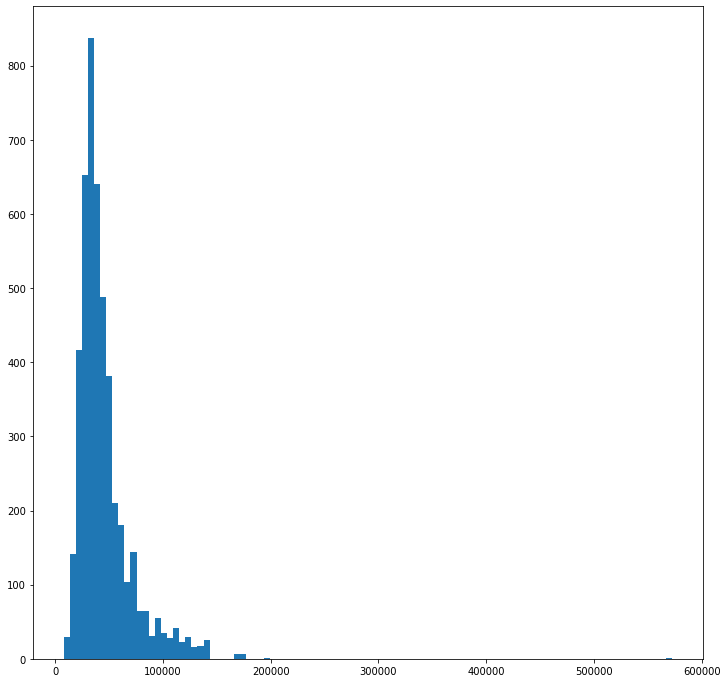

In [64]:
plt.figure(figsize=(12,12))
plt.hist(df_c.salary, bins=100);
#looks like there's a bit of a weird value at the top. I will drop it

In [131]:
df_c  = df_c.drop(df_c[df_c.salary == df_c.salary.max()].index)

In [11]:
df_c.to_csv('indeed-final.csv')

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

#### Thought experiment: What is the baseline accuracy for this model?

In [540]:
df_c.sal_high.value_counts(normalize=True).max()

0.5037037037037037

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [256]:
df_c = df_c.reset_index(drop=True)
df_c['sal_high'] = df_c.salary.map(lambda x: 1 if x > df_c.salary.median() else 0)

In [257]:
X = df_c[['company','days_old','short_title','title','level','location', 'city', 'desc']]
y = df_c['sal_high']

In [258]:
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Making a pipeline for modelling just with location as predictor

In [262]:
class IndeedPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, columns_to_drop = None, columns_to_dummify=None, drop_first=True):
        self.feature_names = []
        self.columns_to_drop = columns_to_drop
        self.columns_to_dummify = columns_to_dummify
        self.drop_first = drop_first
        
    def _drop_unused_cols(self, X):
        for col in self.columns_to_drop:
            try:
                X = X.drop(col, axis=1)
            except:
                pass
        return X

    def transform(self, X, *args):
        X = self._drop_unused_cols(X)
        self.feature_names = X.columns
        return X


    def fit(self, X, *args):
        return self

### A new class to change location column
I want to change my feature column, so that if a location only appears once, it is replaced by the more general search term for location. So for example, Brentford would be replaced with London.

In [272]:
#this class goes at the beginning of my pipeline and fixes the location variable.
class Location_fix(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass#self.column = column

    def fit(self, X, *args):
        return self

    def transform(self, X, *args):
        locs_and_cities = zip(X.location, X.city)
        place, counts = np.unique(X.location.values, return_counts=True)
        place_and_counts = list(zip(place, counts))
        unique_places = [place[0] for place in place_and_counts if place[1]==1]
        new_locs = [lc[1] if lc[0] in unique_places else lc[0] for lc in locs_and_cities]
        X['location'] = new_locs
        return X

### Grid Searching with different classifiers to find the best one classifier and set of hyper-parameters.

In [271]:
scaler = StandardScaler()
l_fix = Location_fix()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ip = IndeedPreprocessor(columns_to_drop=['desc','level', 'short_title', 'company', 'days_old','title'])
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter = 10000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb= GradientBoostingClassifier(min_samples_split=30, max_depth=5, max_features='sqrt')
models = [lr, knn, rf, gb]
pipes = [make_pipeline(ip,l_fix, ohe, scaler,model) for model in models]

Param_grids for diff pipelines

In [255]:
params_lr = { 'logisticregression__penalty': ['l1', 'l2'],
             'logisticregression__C': [1, 0.2, 0.6],
             'logisticregression__solver': ['liblinear']      
}

params_knn = { 'kneighborsclassifier__n_neighbors': [5,10,20],
              'kneighborsclassifier__weights': ['uniform', 'distance'],
}

params_rf = { 'randomforestclassifier__n_estimators': [100,200,300],
             'randomforestclassifier__max_depth': [3,4,5],
             'randomforestclassifier__max_features': ['auto', 3,10,20]    
            }
                 
params_gb = { 
             'gradientboostingclassifier__n_estimators': [50,100,200,1000, 2000, 1500]        
}


In [260]:
#This function gridsearches different pipelines and finds the best one with the best params

def grid_searcher(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                  clfs=None, pipes = {}, 
                  param_list=[params_lr, params_gb, params_knn, params_rf], \
                  save=True, return_=False):
    grids = {}
    #setting up the gridsearches
    assert 'LR' in clfs
    if 'LR' in clfs:
        LR = GridSearchCV(estimator=pipes['LR'],
                param_grid=params_lr,
                scoring='accuracy',
                cv=5)
        grids['LR']= LR
   


    if 'RF' in clfs:
        RF = GridSearchCV(estimator=pipes['RF'],
                param_grid=params_rf,
                scoring='accuracy',
                cv=5)
        grids['RF'] = RF

    if 'KNN'in clfs:
        KNN = GridSearchCV(estimator=pipes['KNN'],
                      param_grid=params_knn,
                      scoring='accuracy',
                      cv=5)
        grids['KNN'] = KNN
        
    if 'GB' in clfs:
        GB = GridSearchCV(estimator=pipes['GB'],
                     param_grid=params_gb,
                     scoring='accuracy')
        grids['GB'] = GB


    # Fit the grid search objects
    print('Performing model optimizations...')
    best_acc = 0.0
    best_clf = 0
    best_gs = ''
    lisr = []

    for name, gs in zip(grids.keys(), grids.values()):
        print('\nEstimator: %s' % name)

        gs.fit(X_train, y_train)
        print('Best params are : %s' % gs.best_params_)
        # Best training data accuracy
        print('Best training accuracy: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred = gs.predict(X_test)
        # Test data accuracy of model with best params
        print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
        # Track best (highest test accuracy) model
        lisr.append(gs.best_params_)
        if accuracy_score(y_test, y_pred) > best_acc:
            best_acc = accuracy_score(y_test, y_pred)
            best_preds = y_pred
            best_gs = gs
            best_name = name
    print('\nClassifier with best test set accuracy: %s' % best_name)
    scores = cross_val_score(best_gs.best_estimator_, X_train,y_train)
    print('CV scores of best estimator: ', scores, scores.mean())
    
    if save:
        # Save best grid search pipeline to file
        dump_file = 'best_grid_search_pipeline.pkl'
        joblib.dump(best_gs, dump_file, compress=1)
        print('\nSaved %s grid search pipeline to file: %s' % (best_name, dump_file))
    
    cf = confusion_matrix(y_pred, y_test, labels = [0,1,2])
    print(cf)
    if return_:
        return best_clf, best_gs, lisr, best_gs.best_estimator_

In [274]:
grid_searcher(clfs=['RF', 'LR', 'KNN'],\
              pipes = {'LR': pipes[0], 'KNN': pipes[1], 'RF': pipes[2]},\
              param_list = [params_rf, params_lr, params_knn], save=False)

Performing model optimizations...

Estimator: LR
Best params are : {'logisticregression__C': 0.2, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best training accuracy: 0.632
Test set accuracy score for best params: 0.649 

Estimator: RF
Best params are : {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__n_estimators': 300}
Best training accuracy: 0.635
Test set accuracy score for best params: 0.630 

Estimator: KNN
Best params are : {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}
Best training accuracy: 0.621
Test set accuracy score for best params: 0.622 

Classifier with best test set accuracy: LR
CV scores of best estimator:  [0.63616071 0.59151786 0.66741071 0.62276786 0.640625  ] 0.6316964285714286
[[333 206   0]
 [211 354   0]
 [  0   0   0]]


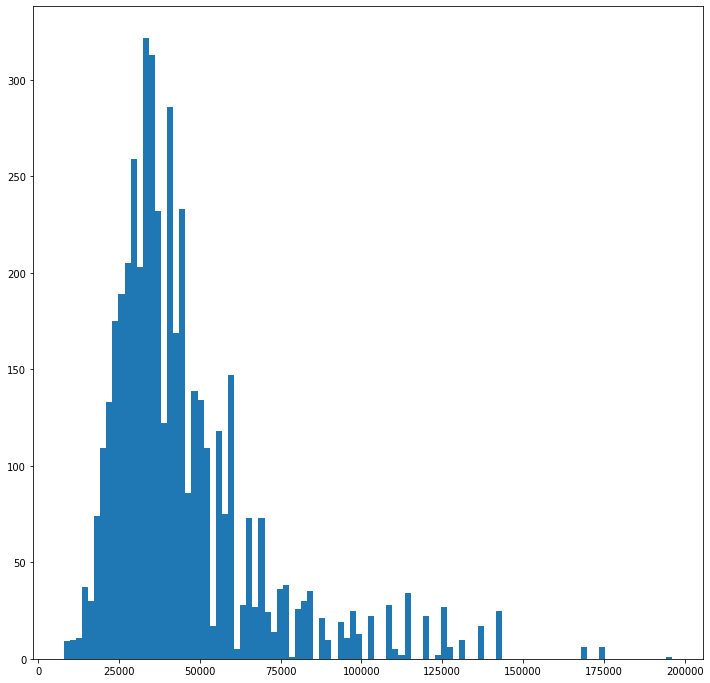

In [67]:
plt.figure(figsize=(9,12))
plt.hist(df_c.salary, bins=100);

## Predicting with multiple features.

I am going to classify salaries by how many sd they are from the mean.   
Low = below mean    
Medium = one sd above mean   
high = more than one sd above mean

In [135]:
def sal_class(x):
    mean = df_c.salary.mean()
    sd = df_c.salary.std()
    if x < mean:
        return 0
    elif x >= mean and x<mean+sd:
        return 1
    else:
        return 2

In [136]:
df_c['sal_'] = df_c.salary.map(sal_class)

In [137]:
X = X
y = df_c['sal_']
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#making a pipeline
cvec = CountVectorizer(stop_words='english')
ip = IndeedPreprocessor(columns_to_drop=['company', 'title'])
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=True)
scaler = StandardScaler(with_mean=False)
col_trans = ColumnTransformer([('desc', cvec, 'desc'), 
                           ('cats', one_hot, ['days_old', 'location', 'short_title','level', 'city'])],
                          remainder='passthrough', # treatment for remaining columns
                         sparse_threshold=1)
models = [lr, knn,rf, gb]
pipes = [make_pipeline(ip, col_trans, scaler, model) for model in models]


params_lr = { 'logisticregression__penalty': ['l1', 'l2'],
             'logisticregression__C': [1, 0.2, 0.6],
             'logisticregression__solver': ['liblinear']      
}

params_knn = { 'kneighborsclassifier__n_neighbors': [5,10,20],
              'kneighborsclassifier__weights': ['uniform', 'distance'],
}

params_rf = { 'randomforestclassifier__n_estimators': [100,200,300],
             'randomforestclassifier__max_depth': [3,4,5],
             'randomforestclassifier__max_features': ['auto', 3,10,20]    
            }
                 
params_gb = { 
             'gradientboostingclassifier__n_estimators': [50,100,200,1000, 2000, 1500]        
}


best_clf, best_gs, lisr, best_gs = grid_searcher(clfs=['RF', 'LR', 'KNN', 'GB'],\
              pipes = {'LR': pipes[0], 'KNN': pipes[1], 'RF': pipes[2], 'GB': pipes[3]},\
              param_list = [params_rf, params_lr, params_knn, params_gb], return_=True)

Performing model optimizations...

Estimator: LR


/Users/williammaclean/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best params are : {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best training accuracy: 0.907
Test set accuracy score for best params: 0.924 

Estimator: RF
Best params are : {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 100}
Best training accuracy: 0.643
Test set accuracy score for best params: 0.644 

Estimator: KNN
Best params are : {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Best training accuracy: 0.893
Test set accuracy score for best params: 0.907 

Estimator: GB
Best params are : {'gradientboostingclassifier__n_estimators': 1000}
Best training accuracy: 0.907
Test set accuracy score for best params: 0.922 

Classifier with best test set accuracy: LR

Saved LR grid search pipeline to file: best_grid_search_pipeline.pkl
[[697  52  12]
 [ 12 215   8]
 [  2   0 106]]


### Feature Importances

In [143]:
best_ = best_gs.estimator
f_names = best_gs.estimator['columntransformer'].get_feature_names()
f_imp  = best_gs.estimator['logisticregression'].coef_
imps = pd.DataFrame({'features': f_names, '0': f_imp[0], '1': f_imp[1], '2':f_imp[2]})
imps[['0a','1a','2a']] = imps[['0','1','2']].apply(lambda x: abs(x))
first = imps.sort_values(by='0a', ascending=False)[0:9]
second = imps.sort_values(by='1a', ascending=False)[0:9]
third = imps.sort_values(by='2a', ascending=False)[0:9]

Text(0.5, 1.0, 'class 2')

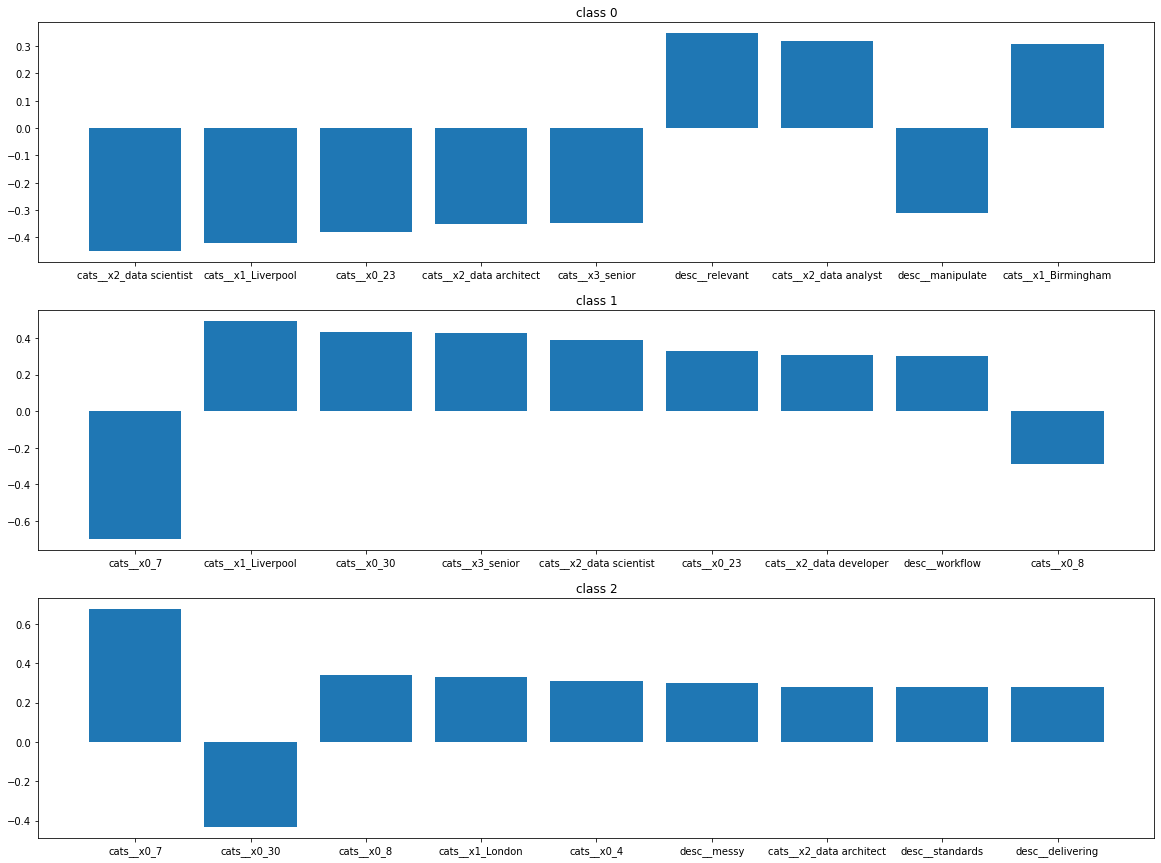

In [185]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
ax[0].bar(first['features'], first['0'])
ax[0].set_title('class 0')
ax[1].bar(second['features'], second['1'])
ax[1].set_title('class 1')
ax[2].bar(third['features'], third['2'])
ax[2].set_title('class 2')

Surprisingly, a very good predictor of salary being high (class 2) appears to be when the job was posted. Newer jobs predict higher salaries. This might be something to do with listings for higher paid jobs being posted for not long on the website. 

Interestingly, the lower salaries do not have any high positive coefficients for a predicting feature. If there was 'data scientist', or 'liverpool' in the description, or if the job was posted 23 days ago, these are good signs the job is not a low salary.

### Model evaluation:

- Use cross-validation to evaluate your models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [231]:
scores = cross_val_score(best_, X_train, y_train)

In [232]:
print('cv scores of best estimator: ', scores)
print('mean cv score of best estimator: ', scores.mean())

cv scores of best estimator:  [0.91071429 0.88169643 0.90401786 0.88616071 0.88392857]
mean cv score of best estimator:  0.8933035714285715


- Evaluate the accuracy, AUC, precision and recall of the models.

The accuracies are above. Most are around 0.89-0.9, apart from random forest which does very badly and gets around .6 on test data.

In [233]:
print('The Roc AUC score for best estimator: ', roc_auc_score(y_test, best_.predict_proba(X_test)[:, 1]))

The Roc AUC score for best estimator:  0.7906808035714286


This ROC AUC is not amazing, but it is still quite good. It means that there is a bit of trade-off in my model between getting true positives and getting false positives, but not so much to mean that I am getting a worrying number of false positives. 

- Plot the ROC and precision-recall curves for at least one of your models.

I can't plot the ROC or precision recall curves for this best estimator because it's not a binary classifier, but I will do it below for a new model which I am going to make for the purposes of the bonus question.

### Model evaluation(cont.):

(I've decided to answer this first bit and the bonus together because they seem like the same question.)   
Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

The boss is saying, in other words, that he would rather have more false negatives than false positives, if positive means a high salary. This means that I need a model which has a high precision, but maybe at the expense of some recall. I will gridsearch logitistic regression on the salary as a binary variable and score for precision.

In [219]:
X = X
y = df_c['sal_high']
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr = LogisticRegression(max_iter=10000)
pipe = make_pipeline(ip, col_trans, scaler, lr)

params_lr = { 'logisticregression__penalty': ['l1', 'l2'],
             'logisticregression__C': [1, 0.2, 0.6],
             'logisticregression__solver': ['liblinear'],
             
}
LR = GridSearchCV(estimator=pipe,
                param_grid=params_lr,
                scoring='precision',
                cv=5)

In [199]:
LR.fit(X_train,y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('indeedpreprocessor',
                                        IndeedPreprocessor(columns_to_drop=['company',
                                                                            'title'])),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=1,
                                                          transformers=[('desc',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'desc'),
                                                                        ('cats',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                     

In [206]:
best = LR.best_estimator_
best.fit(X_train,y_train)
preds = best.predict(X_test)

[LibLinear]

In [207]:
precision = precision_score(y_test, preds)
print('the precision score is: ', precision)

the precision score is:  0.9066427289048474


90% of my predictions are correctly predicted.

In [208]:
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

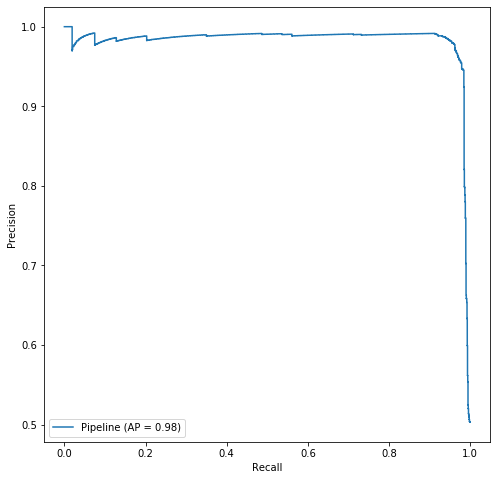

In [213]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
plot_precision_recall_curve(best, X, y, ax=ax);

My precision recall curve here is good. It tells me that I do not have to sacrifice much recall in order to get good precision.

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

Indeed is the the highest-trafficked job site in the US, and in the UK it is similarly popular. It's therefore an ideal place to look for jobs related to data science, as well as more broadly to get information about this specific job market.   

I began by getting all the job postings from the Indeed website. Indeed does not have an API (an approved way for programmers to interact with their data), so I had to scrape the information by writing some code which would load up each page and extract the relevant pieces of information. This posed a few issues, and I had to make the code behave in such a way that the Indeed website would be tricked into thinking my code was actually a human, so would not kick me off the site. 

I first investigated whether a high or a low salary could be predicted only by the location of the job. I created and tested four different models. My best model was a logistic regression model which was able to predict whether a salary was high or low, based only on the location, about 65% of the time. This is not a particularly high accuracy. If I had just predicted a high salary for every job posting, I would have got a score of 50% (baseline accuracy). Because it is only modelled on one feature, there is a limit to how accurate my predictions can be. This model suggested that it would be better to use a combination of other features I have scraped from Indeed as well as location.

I then decided to train a new model. I changed the target variable (salary, the thing I'm predicting) into having three classes instead of two. I did this because I thought that the range of salaries would mean that it would be helpful to classify a bit more precisely. A salary of 40000 is significantly differnet to one of 80000, but in the previous model both would have been classified as high.

To increase the number of features I am using in the model, I used the day of posting of the job, a more specific location, and then the text data of the description on the job posting. (I got rid of any numbers in the text to stop the salary creeping in the back door!) To convert the text to numerical data, I used a vectoriser, which records when certain words were used and with what frequency.

I then created 4 models. Three of these models got excellent training scores, as well as excellent scores on the testing data. I could predict the salary of the job posting 92 percent of the time with the logistic regression model. 

I was slightly surprised that the age of the listing was a good predictor of the salary of the job. This goes to show that statistical models can privilege variables which are surprising to humans. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [18]:
## YOUR LINK HERE IN MARKDOWN FORMAT 